### Table of Contents
- [Early Exploration](#Early-Exploration)
- [Modules](#module)
- [Geographical Exploration](#Geo-Exploration)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb


from matplotlib import patheffects

# graphing related libraries
import pandas_bokeh as pb
import geopandas
from cartopy import crs as ccrs

import os

import src.wrangle as wr

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Early Exploration

- [Return to TOC](#Table-of-Contents)

In [16]:
df = pd.read_pickle('data/data.pickle')

In [6]:
df.tail()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,po_number,order_date,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
7367053,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",22156.38,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911606
7367054,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",9155.50,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911607
7367055,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",44331.09,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911608
7367056,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",8667.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911609
7367057,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",27161.40,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911610


In [13]:
df['order_date'].min(), df['order_date'].max()

('01/01/2016', '12/31/2021')

In [14]:
df['fiscal_year'].min(), df['fiscal_year'].max()

(2014, 2023)

In [15]:
df['shipped_date'].min(),df['shipped_date'].max()

('01/01/2015', '12/31/2021')

In [16]:
df['contract_start_date'].min(), df['contract_start_date'].max()

('05/05/2014', '07/03/2018')

In [17]:
df['contract_end_date'].min(), df['contract_end_date'].max()

('07/03/2022', '07/04/2018')

In [18]:
df['contract_termination_date'].min(), df['contract_termination_date'].max()

('07/03/2023', '07/04/2018')

In [4]:
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']

In [32]:
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']
df_dates = pd.DataFrame()
for column in columns:
    df_dates[column] = pd.to_datetime(df[column])
df_dates = df_dates.set_index('order_date').sort_index()

In [41]:
df_dates['order_date'].min(), df_dates['order_date'].max()

(Timestamp('2014-05-06 00:00:00'), Timestamp('2022-11-29 00:00:00'))

In [42]:
df_dates['shipped_date'].min(),df_dates['shipped_date'].max()

(Timestamp('2014-05-20 00:00:00'), Timestamp('2022-11-30 00:00:00'))

In [43]:
df_dates['contract_start_date'].min(), df_dates['contract_start_date'].max()

(Timestamp('2014-05-05 00:00:00'), Timestamp('2018-07-03 00:00:00'))

In [44]:
df_dates['contract_end_date'].min(), df_dates['contract_end_date'].max()

(Timestamp('2018-07-04 00:00:00'), Timestamp('2023-07-03 00:00:00'))

In [45]:
df_dates['contract_termination_date'].min(), df_dates['contract_termination_date'].max()

(Timestamp('2018-07-04 00:00:00'), Timestamp('2023-07-03 00:00:00'))

In [7]:
df['customer_zip']

981291     78773
981292     78773
981293     78773
981294     78773
981295     78773
           ...  
7367053    77471
7367054    77471
7367055    77471
7367056    77471
7367057    77471
Name: customer_zip, Length: 378523, dtype: object

In [33]:
df = pd.read_pickle('data/data.pickle')
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']

for column in columns:
    df[column] = pd.to_datetime(df[column])
df = df.set_index('order_date').sort_index()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378523 entries, 2014-05-06 to 2022-11-29
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   fiscal_year                378523 non-null  int64         
 1   customer_name              378523 non-null  object        
 2   vendor_name                378523 non-null  object        
 3   purchase_amount            378523 non-null  float64       
 4   contract_number            378523 non-null  object        
 5   rfo_description            378523 non-null  object        
 6   rfo_number                 378523 non-null  object        
 7   customer_type              378523 non-null  object        
 8   customer_contact           369036 non-null  object        
 9   customer_address           378523 non-null  object        
 10  customer_city              378523 non-null  object        
 11  customer_state             378523 no

In [36]:
pd.to_pickle(df, 'data/indexed_cisco.pickle')

In [40]:
df['invoice_number'].nunique(), df['po_number'].nunique()

(54394, 35283)

In [14]:
df.tail()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,invoice_number,po_number,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
order_date,,,,,,,,,,,,,,,,,,,,,
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",22156.38,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911606
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",9155.50,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911607
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",44331.09,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911608
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",8667.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911609
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",27161.40,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911610


In [74]:
(df.contract_start_date.unique(), df.contract_end_date.unique())

(array(['2014-05-05T00:00:00.000000000', '2018-07-03T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array(['2018-07-04T00:00:00.000000000', '2022-07-03T00:00:00.000000000',
        '2023-07-03T00:00:00.000000000'], dtype='datetime64[ns]'))

In [68]:
df['customer_contact'].unique().tolist()

['Randy Stuart',
 'ACCOUNTS PAYABLE',
 'Donald Gordon',
 'Caren Skipworth',
 'FERNANDO MERCADO',
 'Ernie Stripling',
 'Mike Bahr',
 'Curtis Starnes',
 'David Spann',
 'Kayla Lamm',
 'Martin Negron',
 'FRANCISCO DIAZ',
 'ANA I LOZANO',
 'TODD WALSH',
 'Mike Searight',
 'Sherry Watson',
 'PAUL FIERO',
 'TODD CHURCH',
 'Paul Fiero',
 'Mario Leal',
 'Paula Johnson',
 'Gilbert Porras',
 'Shad McGaha',
 'PAULA JOHNSON',
 'Bob Hollar',
 'Paul Aceves',
 'THELMA PERALES',
 'Kenneth Boehs',
 'ERIC RODRIGUEZ',
 'WESLEY JUSTICE',
 'MARILYN DOUGHTY',
 'MARIA DE JESUS GAMBOA',
 'Cody Lee',
 'Diana Rodriquez',
 'ARNIE SALMERON',
 'RODNEY HUDGINS',
 'Ken Woods',
 'TONY WILLIAMS',
 'ACCOUNTS AP PAYABLE',
 'Wayne Henderson',
 'TOMMIE EDMONSON',
 'CARLOS MARTINEZ',
 'JIM RAY JR.',
 'ROBERT LOVE',
 'Jim Beasley',
 'DONNA BOGUES',
 'KENNETH BOEHS',
 'RANAE SAUR',
 'Yalonda Weaver',
 'A. Jamotta',
 'KEVIN FUSELIER',
 'AMELIA SALINAS',
 'HARRY GOETTE',
 'ABELARDO CASILLAS',
 'JOE GALINDO',
 'JAMES MCCOY',
 '

In [69]:
df['vendor_name'].nunique()

1

In [45]:
df['contract_type'].nunique(), df['contract_subtype'].nunique()

(1, 1)

In [64]:
df['rfo_description'].value_counts()

Cisco Branded Products and Related Services     230209
Cisco Branded Equipment and Related Services    148314
Name: rfo_description, dtype: int64

In [66]:
df['rfo_number'].value_counts()

DIR-TSO-TMP-425    230209
DIR-TSO-TMP-215    148314
Name: rfo_number, dtype: int64

In [71]:
df.columns.tolist()

['fiscal_year',
 'customer_name',
 'vendor_name',
 'purchase_amount',
 'contract_number',
 'rfo_description',
 'rfo_number',
 'customer_type',
 'customer_contact',
 'customer_address',
 'customer_city',
 'customer_state',
 'customer_zip',
 'vendor_contact',
 'vendor_hub_type',
 'vendor_address',
 'vendor_city',
 'vendor_state',
 'vendor_zip',
 'reseller_name',
 'reseller_hub_type',
 'reseller_address',
 'reseller_city',
 'reseller_state',
 'reseller_zip',
 'reseller_phone',
 'report_received_month',
 'purchase_month',
 'brand_name',
 'order_quantity',
 'unit_price',
 'invoice_number',
 'po_number',
 'shipped_date',
 'dir_contract_mgr',
 'contract_type',
 'contract_subtype',
 'contract_start_date',
 'contract_end_date',
 'contract_termination_date',
 'sales_fact_number']

In [76]:
df['reseller_hub_type'].value_counts()

Non HUB            273410
Hispanic/Female     77692
Woman Owned         22402
Asian/Female         3372
Black/Female          938
Hispanic/Male         678
Black/Male             30
Asian/Male              1
Name: reseller_hub_type, dtype: int64

In [75]:
df.tail()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,invoice_number,po_number,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
order_date,,,,,,,,,,,,,,,,,,,,,
2022-11-25,2023,Harlingen Waterworks System,"Cisco Systems, Inc.",2469.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,PO BOX 1950,...,GB00475638,232760,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908445
2022-11-28,2023,City of San Antonio,"Cisco Systems, Inc.",430.00,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,Po Box 839966,...,423158,8000437865,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908576
2022-11-28,2023,City of Duncanville,"Cisco Systems, Inc.",525.78,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,203 E. Wheatland Rd.,...,GB00475670,20221128,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908450
2022-11-29,2023,Railroad Commission of Texas,"Cisco Systems, Inc.",418.96,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 12967,...,FJ33157,23-0649,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908685
2022-11-29,2023,Montgomery County Emergency Communications Dis...,"Cisco Systems, Inc.",1376.48,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,Po Box 1830,...,FJ59539,66979,2022-11-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908758


In [88]:
df = pd.read_pickle('data/data.pickle')
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']

for column in columns:
    df[column] = pd.to_datetime(df[column])

df = df.set_index('order_date').sort_index()

drop_columns = ['fiscal_year',
 'rfo_description',
 'rfo_number',
 'brand_name',
 'customer_contact',
 'customer_address',
 'customer_state',
 'customer_zip',
 'vendor_name',
 'vendor_contact',
 'vendor_city',
 'vendor_hub_type',
 'vendor_address',
 'vendor_state',
 'vendor_zip',
 'reseller_address',
 'reseller_state',
 'reseller_zip',
 'reseller_phone',
 'report_received_month',
 'purchase_month',
 'invoice_number',
 'shipped_date',
 'dir_contract_mgr',
 'contract_type',
 'contract_subtype',
 'contract_start_date',
 'contract_end_date',
 'contract_termination_date',
 'sales_fact_number']

df = df.drop(columns = drop_columns)

df.head()

,customer_name,purchase_amount,contract_number,customer_type,customer_city,reseller_name,reseller_hub_type,reseller_city,order_quantity,unit_price,po_number,order_date
981291,Texas Department of Public Safety,2657.25,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,3.0,885.75,21P0008145,2021-03-02
981292,Texas Department of Public Safety,3053.83,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3053.83,21P0008145,2021-03-02
981293,Texas Department of Public Safety,3748.07,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3748.07,21P0008145,2021-03-02
981294,Texas Department of Public Safety,3748.07,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3748.07,21P0008145,2021-03-02
981295,Texas Department of Public Safety,3748.07,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3748.07,21P0008145,2021-03-02


In [85]:
df.shape

(378523, 11)

## module

- [Table of Contents](#Table-of-Contents)

In [48]:
def get_data():
    df = pd.read_pickle('data/data.pickle')

    columns = ['order_date', 'shipped_date']

    for column in columns:
        df[column] = pd.to_datetime(df[column])


    drop_columns = [
     'fiscal_year',
     'rfo_description',
     'rfo_number',
     'brand_name',
     'customer_contact',
     'customer_address',
     'customer_state',
     'customer_zip',
     'vendor_name',
     'vendor_contact',
     'vendor_city',
     'vendor_hub_type',
     'vendor_address',
     'vendor_state',
     'vendor_zip',
     'reseller_address',
     'reseller_state',
     'reseller_zip',
     'reseller_phone',
     'report_received_month',
     'purchase_month',
     'invoice_number',
     'shipped_date',
     'dir_contract_mgr',
     'contract_type',
     'contract_subtype',
     'contract_start_date',
     'contract_end_date',
     'contract_termination_date',
     'sales_fact_number']

    df = df.drop(columns = drop_columns)
    df = df.set_index('order_date').sort_index()
    df = df.loc['2018':]
    
    return df

In [109]:
df = df.set_index('order_date').sort_index()

In [113]:
df.isnull().count

<bound method DataFrame.count of             customer_name  purchase_amount  contract_number  customer_type  \
order_date                                                                   
2018-01-02          False            False            False          False   
2018-01-02          False            False            False          False   
2018-01-02          False            False            False          False   
2018-01-02          False            False            False          False   
2018-01-02          False            False            False          False   
...                   ...              ...              ...            ...   
2022-11-25          False            False            False          False   
2022-11-28          False            False            False          False   
2022-11-28          False            False            False          False   
2022-11-29          False            False            False          False   
2022-11-29          False      

In [ ]:
df['reseller_hub_type'].isnull()

981291     False
981292     False
981293     False
981294     False
981295     False
           ...  
7367053    False
7367054    False
7367055    False
7367056    False
7367057    False
Name: reseller_hub_type, Length: 378523, dtype: bool

In [103]:
df['reseller_hub_type'].unique()

array(['Non HUB', 'Hispanic/Male', 'Hispanic/Female', 'Asian/Female',
       'Black/Female', 'Woman Owned', 'Black/Male', 'Asian/Male'],
      dtype=object)

In [104]:
def basic_clean(df:pd.DataFrame) -> pd.DataFrame:
    '''
    Remove unneeded columns
    Create a copy of order date
    Changes dates type
    Sets order date as an index
    Parameters:
        df: pandas data frame
    Returns:
        cleaned data frame
    '''
    # list of columns to drop
    drop_columns = [
     'fiscal_year',
     'rfo_description',
     'rfo_number',
     'contract_number',
     'customer_contact',
     'customer_address',
     'customer_state',
     'customer_zip',
     'vendor_name',
     'vendor_contact',
     'vendor_hub_type',
     'vendor_address',
     'vendor_state',
     'vendor_city',
     'vendor_zip',
     'reseller_hub_type',
     'reseller_address',
     'reseller_state',
     'reseller_zip',
     'reseller_phone',
     'report_received_month',
     'brand_name',
     'purchase_month',
     'invoice_number',
     'dir_contract_mgr',
     'contract_type',
     'contract_subtype',
     'contract_start_date',
     'contract_end_date',
     'contract_termination_date',
     'sales_fact_number']

    df = df.drop(columns = drop_columns)
    # create a copy for the shipped date
    df['order_date_copy'] = df.order_date

    # convert order date and shpping date to datetime
    df.order_date = pd.to_datetime(df.order_date)
    df.shipped_date = pd.to_datetime(df.shipped_date)
    df.order_date_copy = pd.to_datetime(df.order_date_copy)

    # save the shipped date as index
    df = df.set_index('order_date').sort_index()

    # data doesn't have enough info about 2017, so we starts from 2018
    df = df.loc['2018':]
    return df

In [105]:
df = pd.read_pickle('data/data.pickle')
columns = ['order_date', 'shipped_date']

df = basic_clean(df)
df.head()

,customer_name,purchase_amount,customer_type,customer_city,reseller_name,reseller_city,order_quantity,unit_price,po_number,shipped_date,order_date_copy
order_date,,,,,,,,,,,
2018-01-02,Odem-Edroy Independent School District,4532.00,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,283.25,173494,2018-01-11,2018-01-02
2018-01-02,Odem-Edroy Independent School District,2860.00,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,178.75,173494,2018-01-11,2018-01-02
2018-01-02,Odem-Edroy Independent School District,187.04,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,11.69,173494,2018-01-11,2018-01-02
2018-01-02,Odem-Edroy Independent School District,428.96,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,26.81,173494,2018-01-11,2018-01-02
2018-01-02,San Benito Consolidated Independent School Dis...,63.36,K-12,San Benito,"Insight Public Sector, Inc.",Tempe,1.0,63.36,191971,2018-02-03,2018-01-02


In [107]:
df.isnull().count

<bound method DataFrame.count of             customer_name  purchase_amount  customer_type  customer_city  \
order_date                                                                 
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
...                   ...              ...            ...            ...   
2022-11-25          False            False          False          False   
2022-11-28          False            False          False          False   
2022-11-28          False            False          False          False   
2022-11-29          False            False          False          False   
2022-11-29          False            False          Fal

In [8]:
df['order_quantity'].max(), df['order_quantity'].min()

(94093187.0, -1273855.9375)

In [10]:
df[df['order_quantity'] < 0].shape

(2863, 19)

## Vizualizations



<AxesSubplot:xlabel='order_date'>

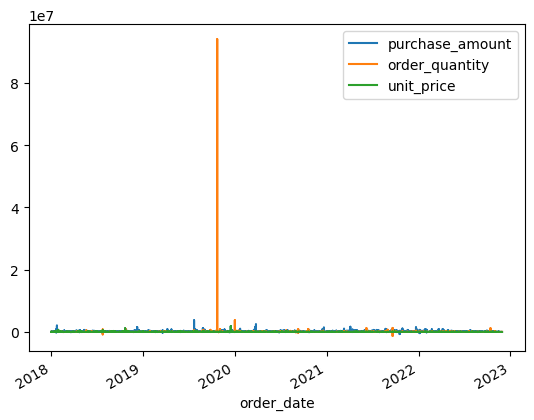

In [115]:
df.plot()

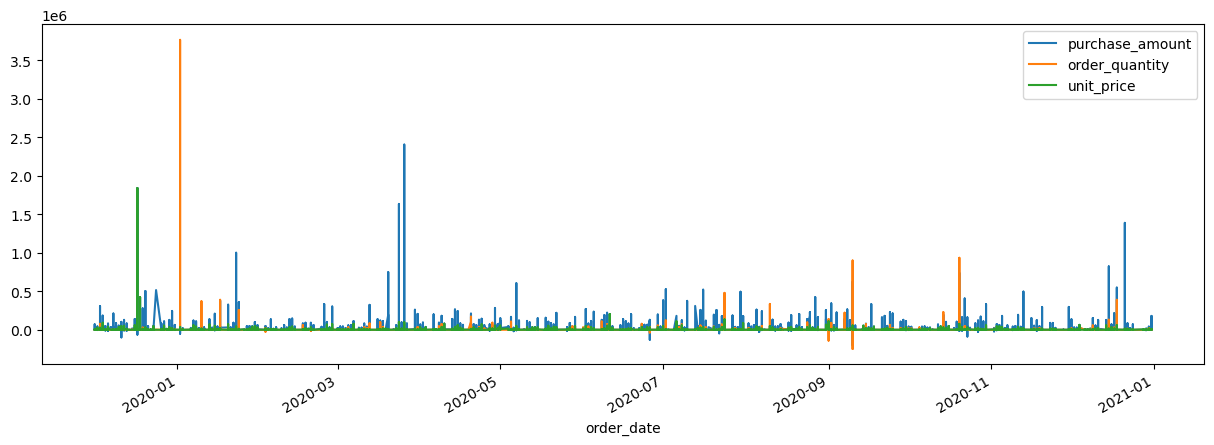

In [89]:
df = get_data()
pandemic_df = df.loc[df.index >= '12-01-2019']
pandemic_df = pandemic_df.loc[pandemic_df.index < '01-01-2021']

fix, ax = plt.subplots(figsize = (15,5))
#ax = pandemic_df.plot(x_compat=True)
pandemic_df.plot(ax=ax, label='Training Set')
plt.show()

<BarContainer object of 5 artists>

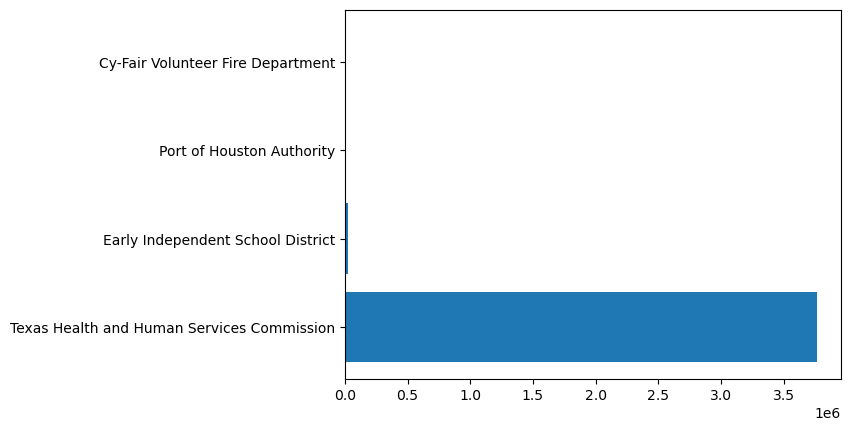

In [92]:
jan2 = pandemic_df.loc[pandemic_df.index == '01-02-2020']
jan2purchases = jan2.sort_values(by=['order_quantity'], ascending = False).head(5)
fig, ax = plt.subplots()
ax.barh(data.customer_name, data.order_quantity)

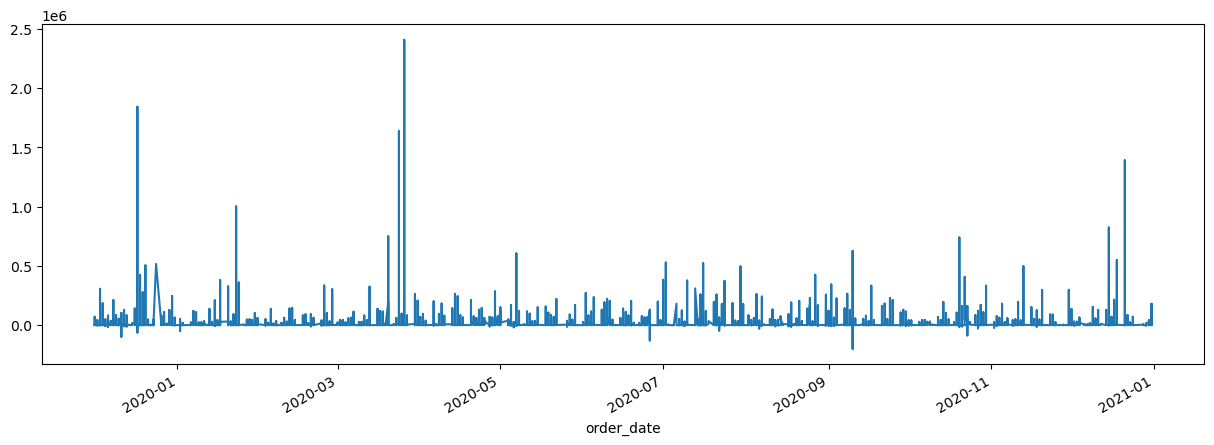

In [56]:
fix, ax = plt.subplots(figsize = (15,5))
#ax = pandemic_df.plot(x_compat=True)
pandemic_df['purchase_amount'].plot(ax=ax, label='Training Set')
plt.show()

### Train / Test Split

In [49]:
df = get_data()
df.head()

,customer_name,purchase_amount,contract_number,customer_type,customer_city,reseller_name,reseller_hub_type,reseller_city,order_quantity,unit_price,po_number
order_date,,,,,,,,,,,
2018-01-02,Odem-Edroy Independent School District,4532.00,DIR-TSO-2542,K-12,Odem,Great South Texas Corporation dba Computer Sol...,Woman Owned,San Antonio,16.0,283.25,173494
2018-01-02,Odem-Edroy Independent School District,2860.00,DIR-TSO-2542,K-12,Odem,Great South Texas Corporation dba Computer Sol...,Woman Owned,San Antonio,16.0,178.75,173494
2018-01-02,Odem-Edroy Independent School District,187.04,DIR-TSO-2542,K-12,Odem,Great South Texas Corporation dba Computer Sol...,Woman Owned,San Antonio,16.0,11.69,173494
2018-01-02,Odem-Edroy Independent School District,428.96,DIR-TSO-2542,K-12,Odem,Great South Texas Corporation dba Computer Sol...,Woman Owned,San Antonio,16.0,26.81,173494
2018-01-02,San Benito Consolidated Independent School Dis...,63.36,DIR-TSO-2542,K-12,San Benito,"Insight Public Sector, Inc.",Non HUB,Tempe,1.0,63.36,191971


In [50]:
train = df.loc[df.index < '01-01-2022']
test = df.loc[df.index >= '01-01-2022']

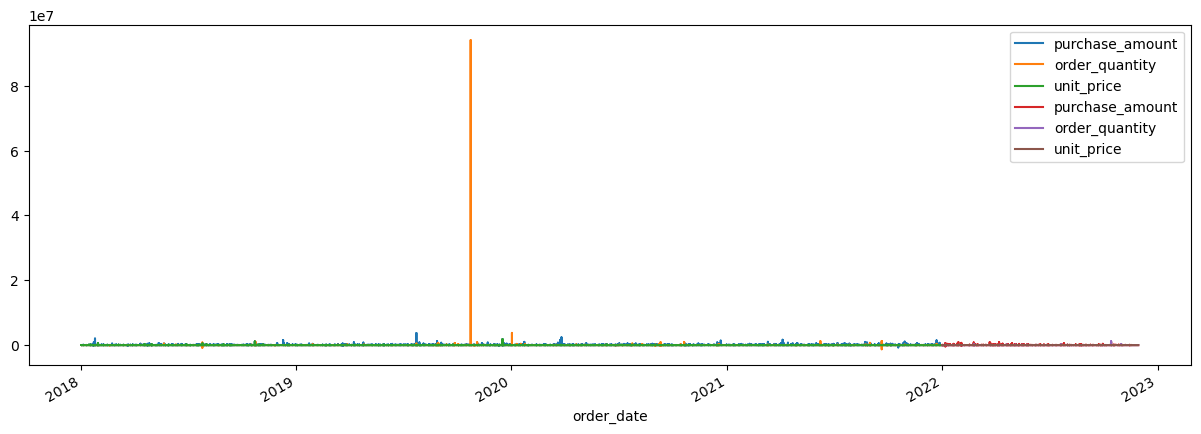

In [51]:
fix, ax = plt.subplots(figsize = (15,5))

train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label= 'Test Set')
plt.show()

## Geo-Exploration

- [Return to TOC](#Table-of-Contents)

In [6]:
#df = wr.get_clean_data()
#df.to_pickle('data/cleaned_df.pickle')
#df.head()

In [22]:
df = pd.read_pickle('data/data.pickle')

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,year,month_name,day_name,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,2.0,4328.10,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,8656.20
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0,6017.76,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,24071.04
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0,6085.80,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,6085.80
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0,720.50,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,2882.00
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0,268.55,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,268.55


In [5]:
covidworld = world.plot(column='Cases - cumulative total per 1 million population',\
legend=True, legend_kwds={'shrink': 0.5}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

covidworld = world.plot()

In [ ]:
texassales = texas.plot

In [ ]:
pandas_bokeh.output_notebook()

canada = geopandas.read_file("./gfsa000b11a_e.shp")
ontario = canada[canada['PRUID'] == '35']

# Sample data to plot
df=pd.DataFrame({'PCODE': ['P0V','P0L','P0T','P0Y', 'P0G', 'P2N'], 'A':[6,3,5,2,2,4] })

# Join ontario dataset with sample data
new_df=ontario.join(df.set_index('PCODE'), on='CFSAUID')


new_df.plot_bokeh(simplify_shapes=20000,
                  category="A", 
                  colormap="Spectral", 
                  hovertool_columns=["CFSAUID","A"])

In [ ]:
pandas_bokeh.output_notebook()

texas = 

<AxesSubplot:>

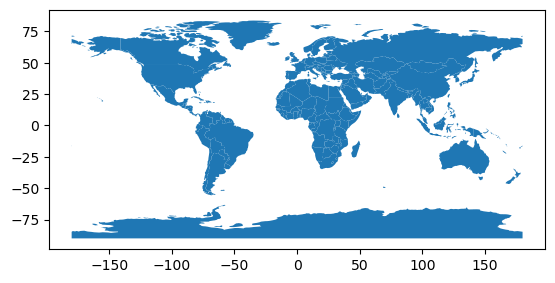

In [15]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()

In [3]:
usa = geopandas.read_file(geopandas.datasets.get_path('tl_2022_us_state'))

<AxesSubplot:>

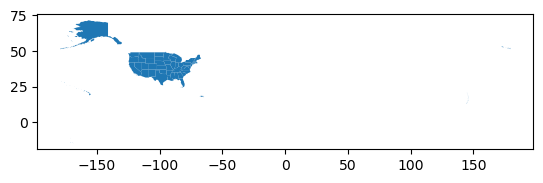

In [4]:
usa.plot()

In [5]:
usa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   REGION    56 non-null     object  
 1   DIVISION  56 non-null     object  
 2   STATEFP   56 non-null     object  
 3   STATENS   56 non-null     object  
 4   GEOID     56 non-null     object  
 5   STUSPS    56 non-null     object  
 6   NAME      56 non-null     object  
 7   LSAD      56 non-null     object  
 8   MTFCC     56 non-null     object  
 9   FUNCSTAT  56 non-null     object  
 10  ALAND     56 non-null     int64   
 11  AWATER    56 non-null     int64   
 12  INTPTLAT  56 non-null     object  
 13  INTPTLON  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 6.7+ KB


In [17]:
usa[usa['STUSPS'] == 'TX']

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
25,3,7,48,01779801,48,TX,Texas,00,G4000,A,676685555821,18974391187,+31.4347032,-099.2818238,"POLYGON ((-98.42353 34.08284, -98.42235 34.082..."


In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

NameError: name 'make_axes_locatable' is not defined

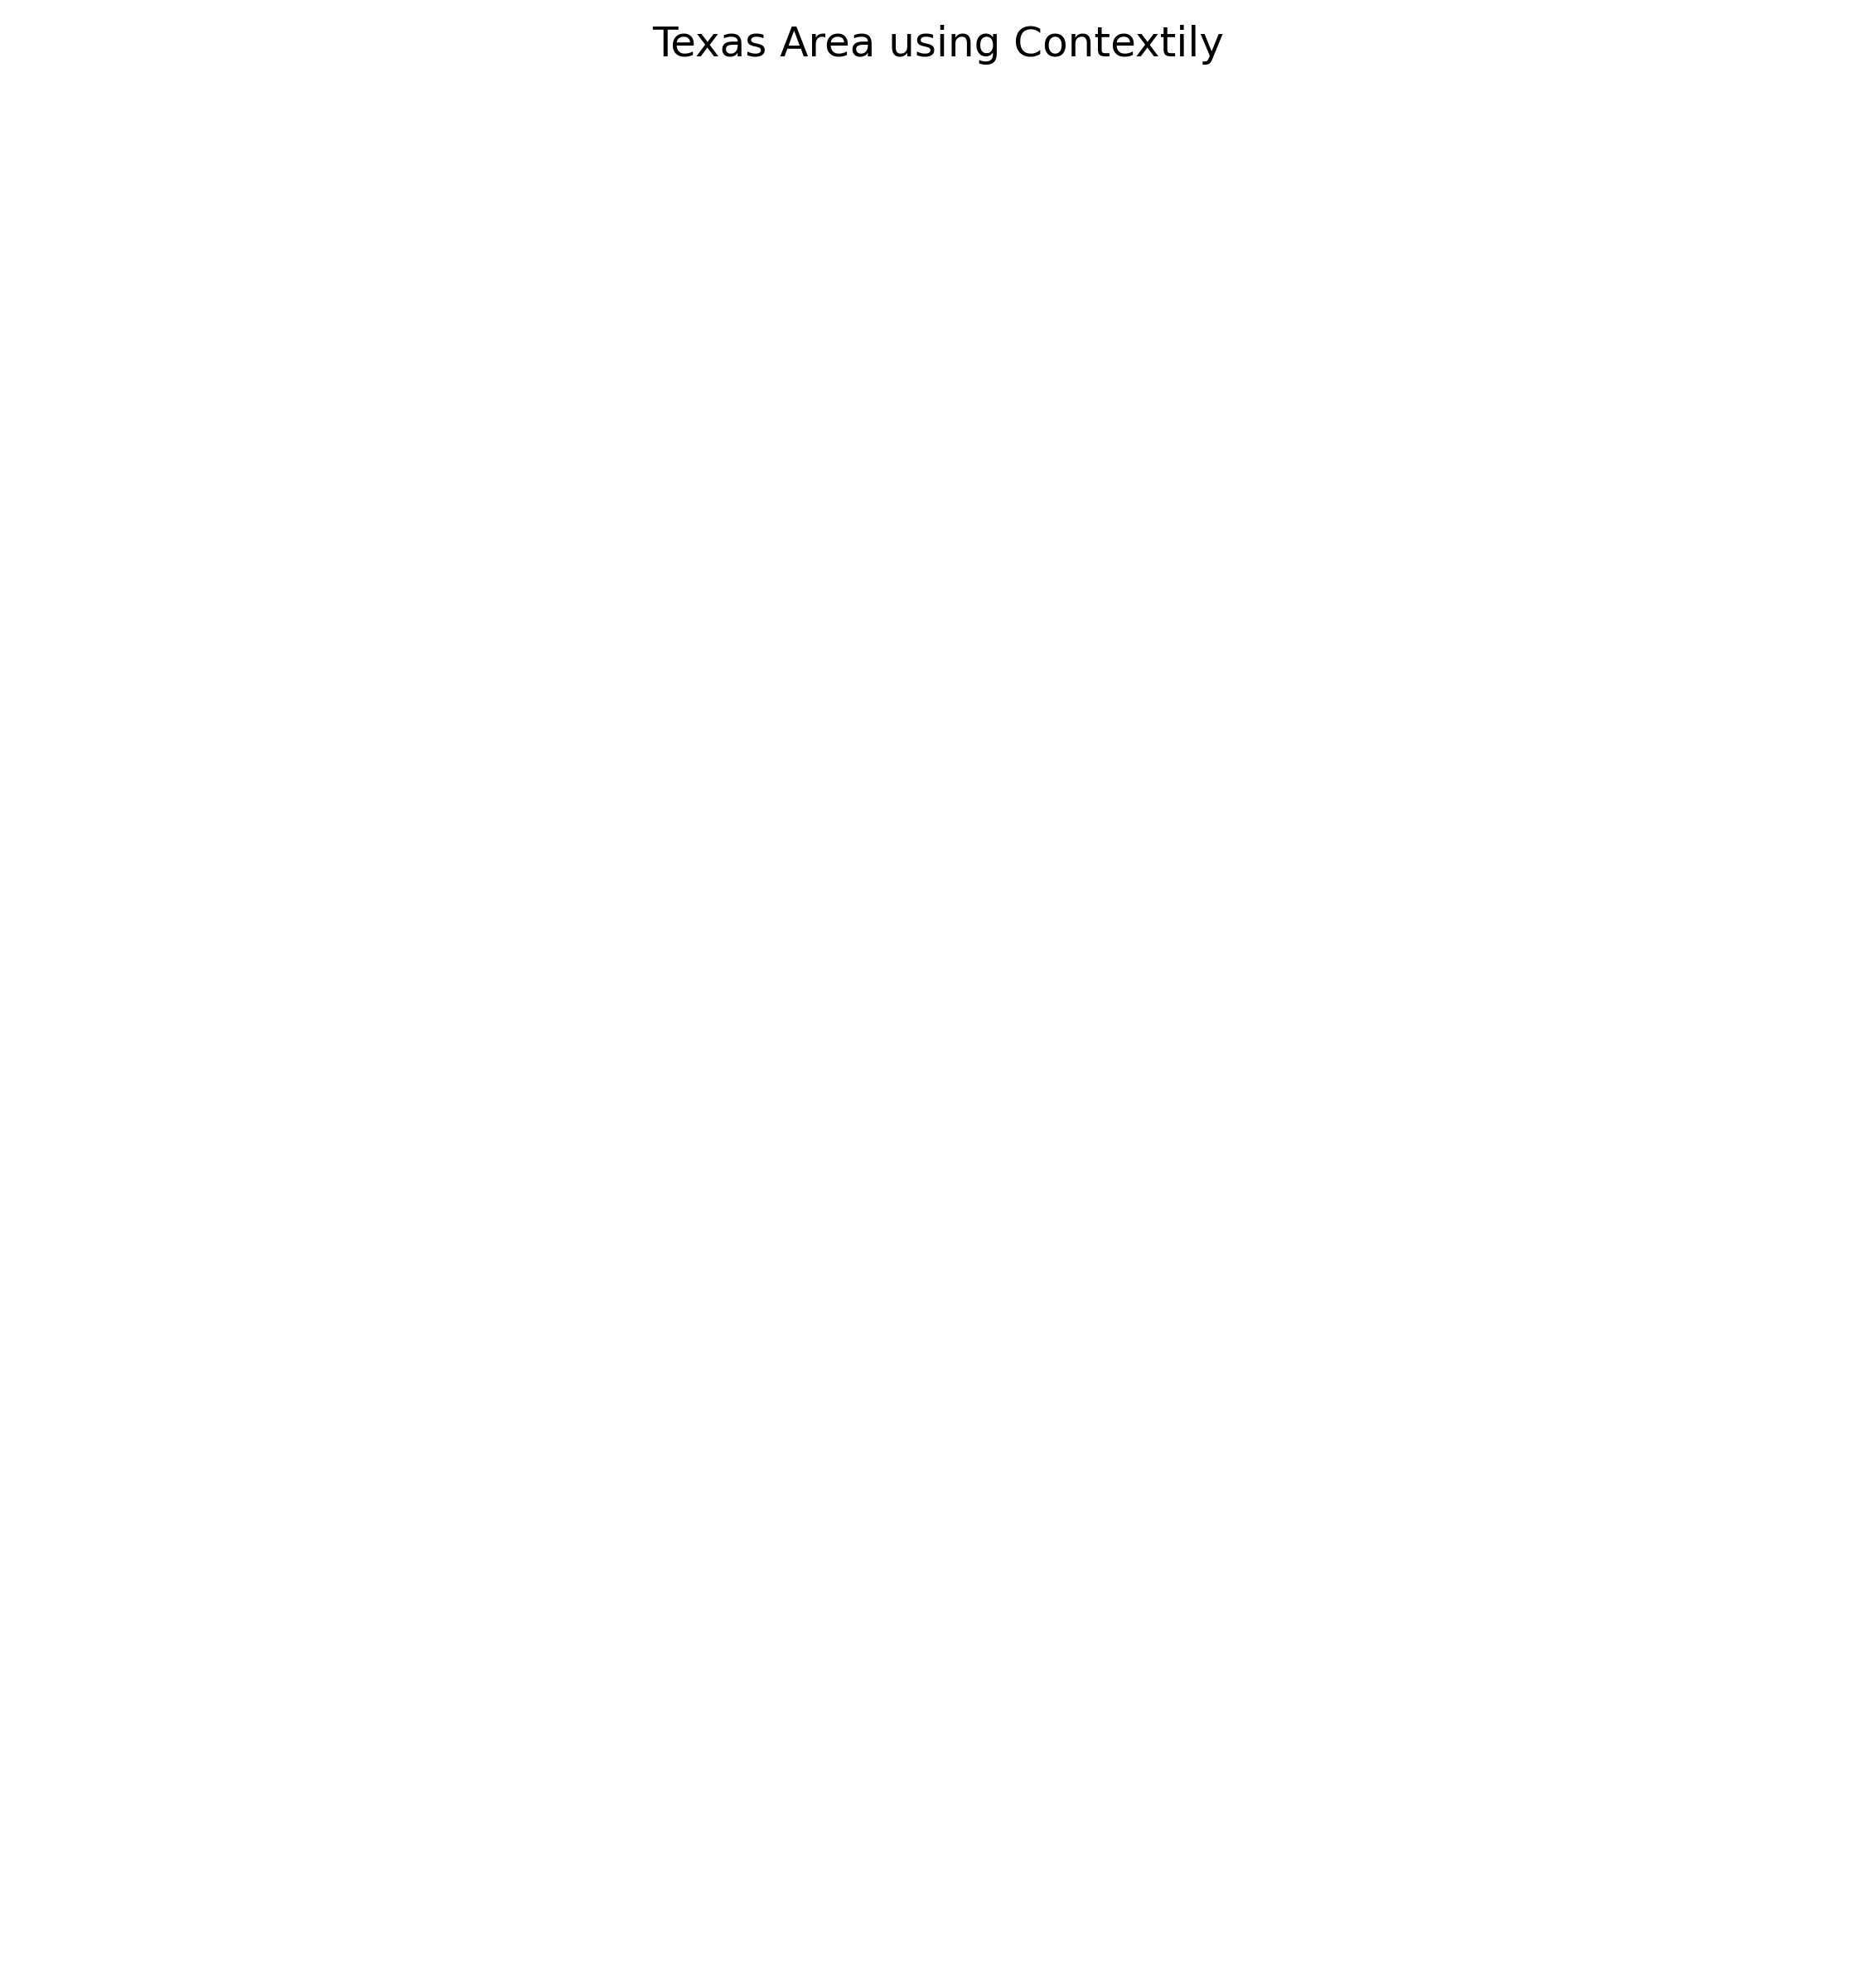

In [19]:
texas = usa.loc[usa['STUSPS'] == 'TX']
texas.crs = "EPSG:4326"
f,ax = plt.subplots(1,1, figsize=(8,8), 
sharex=True,sharey=True, dpi=300)
f.tight_layout(pad=0.8)
ax.set_axis_off()


plt.title('Texas Area using Contextily',fontsize='large')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ux = texas.to_crs(epsg=3857).plot('ALAND_miles', 
                                  ax=ax, 
                                  edgecolor='blue',    
                                  cmap='summer', 
                                  alpha = 0.2, 
                                  legend=True, 
                                  cax=cax)
ctx.add_basemap(ux,    
                zoom=zoom,
                source=ctx.providers.OpenStreetMap.Mapnik);
plt.ylabel('Million square miles', fontsize=12)
# Use savefig to save your map
plt.savefig(
'US Contextily Map with zoom = ' + str(zoom) +' .png')
plt.show()



#texas.plot()

In [ ]:
def tx_plot(data,cmap,zoom,dpi):
    texas = usa.loc[us49['STUSPS'] == 'TX']
    texas.crs = "EPSG:4326"
    f,ax = plt.subplots(1,1, figsize=(8,8), 
    sharex=True,sharey=True, dpi=dpi)
    f.tight_layout(pad=0.8)
    ax.set_axis_off()
    plt.title('Map using Contextily - ' + data,fontsize='large')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)
    ux = state.to_crs(epsg=3857).plot(data, ax=ax, 
    edgecolor='blue',    cmap=cmap, alpha = 0.2, 
    legend=True, cax=cax)
    ctx.add_basemap(ux,    zoom=zoom,
     source=ctx.providers.OpenStreetMap.Mapnik);
    plt.ylabel('Million square miles', fontsize=12)
    # Use savefig to save your map
    plt.savefig(
    'US Contextily Map with zoom = ' + str(zoom) +' .png')
    plt.show()